<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prerequisites</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Describe-data" data-toc-modified-id="Describe-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Describe data</a></span><ul class="toc-item"><li><span><a href="#Sample-size" data-toc-modified-id="Sample-size-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Sample size</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Shapiro-Wilk-Test" data-toc-modified-id="Shapiro-Wilk-Test-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Shapiro-Wilk Test</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Histograms</a></span></li></ul></li><li><span><a href="#Kendall's-Tau-correlation" data-toc-modified-id="Kendall's-Tau-correlation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Kendall's Tau correlation</a></span></li><li><span><a href="#Correlation-Heatmap" data-toc-modified-id="Correlation-Heatmap-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation Heatmap</a></span></li></ul></li></ul></div>

# Prerequisites

**Import packages**

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import kendalltau

**Import data**

In [2]:
df = pd.read_csv('data/cleaned_data_gca.csv')

# Exploratory data analysis

## Describe data

In [3]:
df.head()

,age,education level,gender,income,reference persons,injunctive norm,descriptive norm,perceived consumer effectiveness,social desireability,environmental attitudes,technosalvation,personal affectedness,voluntary simplicity,perceived behavioral control,personal norms,connectedness to nature,guilt,intention to change behavior,self-reported PEB,assessed PEB
0,30.0,Hochschulabschluss,Männlich,4.0,4.0,6.0,3.0,7.0,3.0,5.0,7.0,6.0,4.0,3.0,7.0,4.0,5.0,7.0,6.0,0.0
1,34.0,Hochschulabschluss,Männlich,6.0,2.0,5.0,2.0,3.0,3.0,6.0,6.0,7.0,5.5,5.0,7.0,6.0,6.0,6.5,5.5,1.0
2,24.0,Abitur,Männlich,3.0,2.0,4.0,1.0,7.0,1.0,2.5,1.0,5.0,6.5,3.0,7.0,2.0,6.0,7.0,2.5,0.0
3,29.0,Hochschulabschluss,Männlich,5.0,2.0,6.0,4.0,2.0,2.0,6.5,7.0,4.0,4.5,6.0,6.0,6.0,5.0,6.0,3.0,0.0
4,23.0,Abitur,Männlich,1.0,2.0,2.0,3.0,7.0,3.0,4.0,4.0,3.0,5.5,5.0,7.0,7.0,6.0,6.5,5.5,2.0


### Sample size

In [4]:
print('Sample size socio-demographics =', df[df.columns[0]].count())
print('Sample size psychological variables =', df[df.columns[4]].count())

Sample size socio-demographics = 24
Sample size psychological variables = 25


### Descriptive statistics

**Descriptive statistics for numeric data**

In [5]:
descriptive_stat = df.describe()
descriptive_stat = descriptive_stat.T
descriptive_stat['skew'] = df.skew()
descriptive_stat['kurtosis'] = df.kurt()
descriptive_stat.insert(loc=5, column='median', value=df.median())

descriptive_stat=descriptive_stat.apply(pd.to_numeric, errors='ignore')

In [6]:
descriptive_stat.round(decimals=2)

,count,mean,std,min,25%,median,50%,75%,max,skew,kurtosis
age,24.0,24.71,7.10,14.0,17.75,23.5,23.5,30.0,39.0,0.26,-1.00
income,24.0,4.08,1.79,1.0,3.00,5.0,5.0,5.0,7.0,-0.63,-0.67
reference persons,25.0,2.92,1.04,1.0,2.00,3.0,3.0,3.0,5.0,0.17,0.02
injunctive norm,25.0,4.16,1.75,1.0,3.00,4.0,4.0,6.0,7.0,-0.06,-1.10
descriptive norm,25.0,2.44,1.12,1.0,2.00,2.0,2.0,3.0,5.0,0.55,-0.40
perceived consumer effectiveness,25.0,5.36,1.63,2.0,4.00,6.0,6.0,7.0,7.0,-0.58,-0.96
social desireability,25.0,3.56,1.56,1.0,3.00,3.0,3.0,5.0,6.0,-0.05,-0.91
environmental attitudes,25.0,6.16,1.08,2.5,6.00,6.5,6.5,7.0,7.0,-2.03,4.85
technosalvation,25.0,4.88,1.79,1.0,4.00,5.0,5.0,6.0,7.0,-0.95,0.18
personal affectedness,25.0,5.12,1.69,2.0,4.00,6.0,6.0,7.0,7.0,-0.43,-1.13


**Descriptive statistics for categorical data**

In [7]:
for col in list(df[['gender','education level']]):
  print('variable:', col)
  print(df[col].value_counts(dropna=False).to_string())
  print('')

variable: gender
Männlich    13
Weiblich    11
NaN          1

variable: education level
Hochschulabschluss          12
Abitur                       5
derzeit noch Schüler\*in     4
derzeit noch Schüler/*in     3
NaN                          1



### Shapiro-Wilk Test

In [8]:
# define Shapiro Wilk Test function
def shapiro_test(data):
    '''calculate K-S Test for and out  results in table'''    
    data = data._get_numeric_data()
    data_shapiro_test = pd.DataFrame()
    
    # Iterate over columns, calculate test statistic & create table
    for column in data: 
        column_shapiro_test = scipy.stats.shapiro(data[column])
        shapiro_pvalue_column = column_shapiro_test.pvalue
        if column_shapiro_test.pvalue < .05:
            shapiro_pvalue_column = '{:.5f}'.format(shapiro_pvalue_column) + '*'
            column_distr = 'non-normal'
        else:
            column_distr = 'normal'
        new_row = {'variable': column, 
                   'Shapiro Wilk p-value': shapiro_pvalue_column, 
                   'Shapiro Wilk statistic': column_shapiro_test.statistic,
                   'distribution': column_distr
                  }
        data_shapiro_test = data_shapiro_test.append(new_row, ignore_index=True)
        data_shapiro_test = data_shapiro_test[['variable', 'Shapiro Wilk statistic', 'Shapiro Wilk p-value', 'distribution']]
    return data_shapiro_test

In [9]:
shapiro_test(df)

,variable,Shapiro Wilk statistic,Shapiro Wilk p-value,distribution
0,age,NaN,1,normal
1,income,NaN,1,normal
2,reference persons,0.912744,0.03511*,non-normal
3,injunctive norm,0.937210,0.127596,normal
4,descriptive norm,0.892133,0.01242*,non-normal
5,perceived consumer effectiveness,0.860025,0.00275*,non-normal
6,social desireability,0.931832,0.095806,normal
7,environmental attitudes,0.760719,0.00005*,non-normal
8,technosalvation,0.874738,0.00539*,non-normal
9,personal affectedness,0.881150,0.00730*,non-normal


### Histograms

**Histograms: Likert-scale variables**

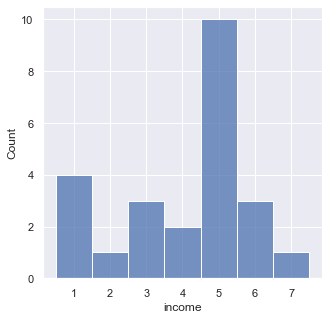

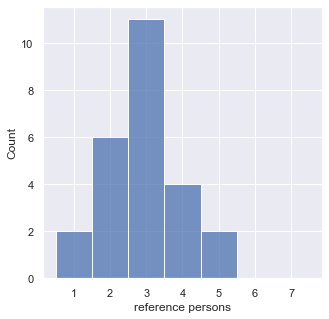

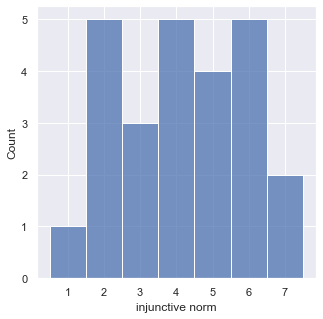

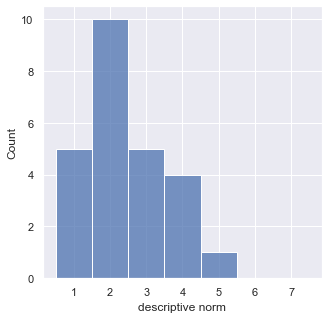

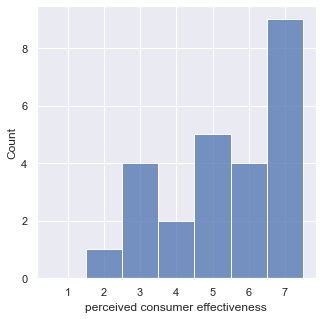

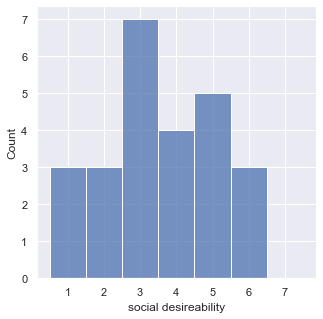

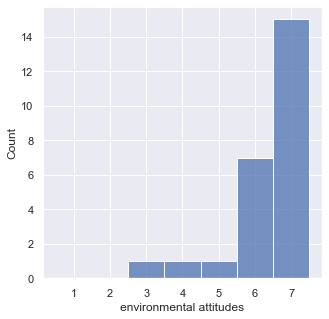

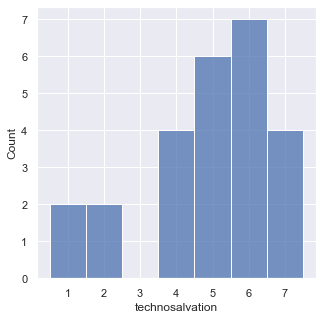

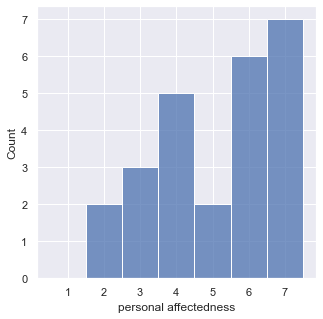

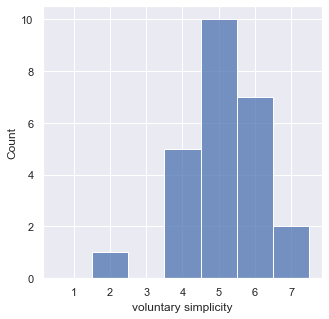

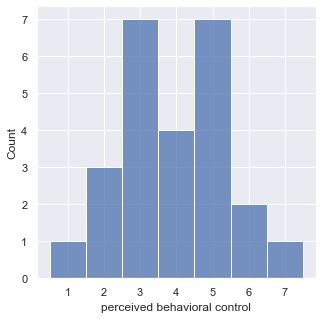

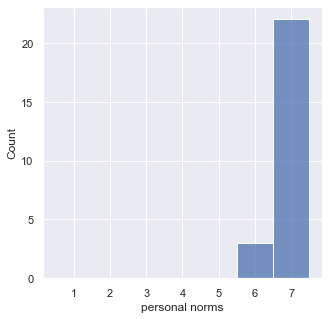

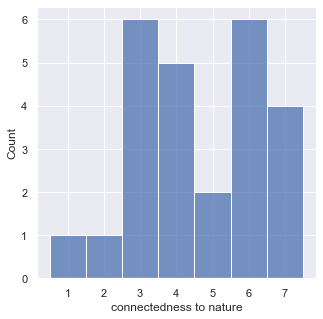

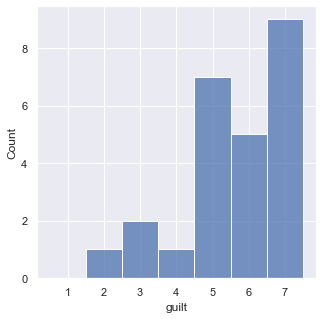

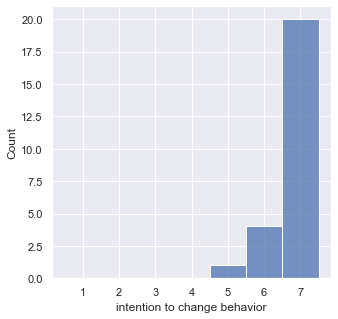

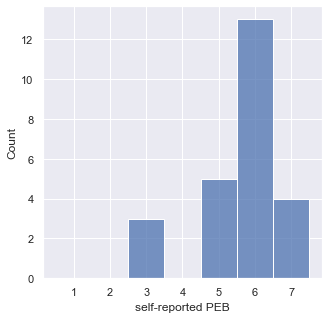

In [10]:
for column in df._get_numeric_data().drop(columns=['assessed PEB','age']):
    sns.set(rc={'figure.figsize':(5,5)})
    data = df[column]
    sns.histplot(data, bins=np.arange(1,9)-.5) 
    plt.xlabel(column)
    plt.show()

**Histogramm: age**

<AxesSubplot:xlabel='age', ylabel='Count'>

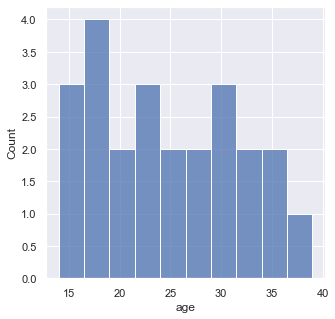

In [11]:
sns.histplot(df['age'], bins=10)

**Histogramm: assessed PEB**

<AxesSubplot:xlabel='assessed PEB', ylabel='Count'>

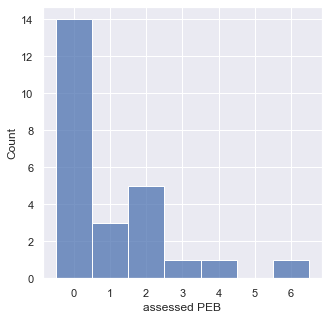

In [12]:
sns.histplot(df['assessed PEB'], bins=np.arange(0,8)-.5)

## Kendall's Tau correlation

In [13]:
# create df with correlation coefficient and p-value indication
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

# calculate kendall's tau correlation with p values ( < .01 = ***, < .05 = **, < .1 = *)
tau = df.corr(method = 'kendall').round(decimals=2)

pval = df.corr(method=kendall_pval) - np.eye(*tau.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05] if x<=t]))
tau_corr_with_p_values = tau.round(4).astype(str) + p

In [14]:
# set colored highlights for correlation matrix
def color_sig_blue(val):
    """
    color all significant values in blue
    """
    color = 'blue' if val.endswith('*') else 'black'
    return 'color: %s' % color

In [15]:
tau_corr_with_p_values.style.applymap(color_sig_blue)

,age,income,reference persons,injunctive norm,descriptive norm,perceived consumer effectiveness,social desireability,environmental attitudes,technosalvation,personal affectedness,voluntary simplicity,perceived behavioral control,personal norms,connectedness to nature,guilt,intention to change behavior,self-reported PEB,assessed PEB
age,1.0**,0.22,-0.07,0.11,0.2,-0.38*,-0.11,-0.12,0.19,-0.19,0.12,-0.07,-0.3,-0.08,-0.21,0.05,0.02,-0.27
income,0.22,1.0**,0.09,0.17,0.04,-0.37*,-0.18,-0.02,0.28,0.08,-0.06,0.22,-0.26,-0.09,-0.06,-0.11,0.02,-0.18
reference persons,-0.07,0.09,1.0**,0.06,-0.2,0.07,0.45**,-0.23,0.16,-0.14,-0.44**,-0.42*,-0.08,-0.46**,-0.36*,-0.37*,-0.11,-0.06
injunctive norm,0.11,0.17,0.06,1.0**,0.26,-0.23,-0.1,-0.17,0.16,0.0,0.01,-0.05,-0.23,-0.21,-0.21,-0.13,0.07,-0.23
descriptive norm,0.2,0.04,-0.2,0.26,1.0**,-0.02,-0.28,-0.03,0.33*,0.11,0.18,0.44**,-0.2,0.17,-0.06,-0.07,0.27,-0.26
perceived consumer effectiveness,-0.38*,-0.37*,0.07,-0.23,-0.02,1.0**,-0.03,-0.06,-0.3,0.19,-0.01,0.11,0.21,0.04,0.2,0.26,-0.05,0.25
social desireability,-0.11,-0.18,0.45**,-0.1,-0.28,-0.03,1.0**,0.02,-0.04,-0.12,-0.19,-0.22,-0.08,-0.11,-0.29,-0.25,-0.27,0.17
environmental attitudes,-0.12,-0.02,-0.23,-0.17,-0.03,-0.06,0.02,1.0**,-0.01,0.05,-0.09,0.13,0.19,0.12,0.22,0.34,0.33*,0.2
technosalvation,0.19,0.28,0.16,0.16,0.33*,-0.3,-0.04,-0.01,1.0**,-0.05,-0.29,0.23,-0.04,0.07,-0.24,-0.14,0.07,-0.02
personal affectedness,-0.19,0.08,-0.14,0.0,0.11,0.19,-0.12,0.05,-0.05,1.0**,-0.02,0.18,0.12,0.12,0.32,0.11,0.16,0.0


## Correlation Heatmap

All not significant correlations (p < .05) are not shown.

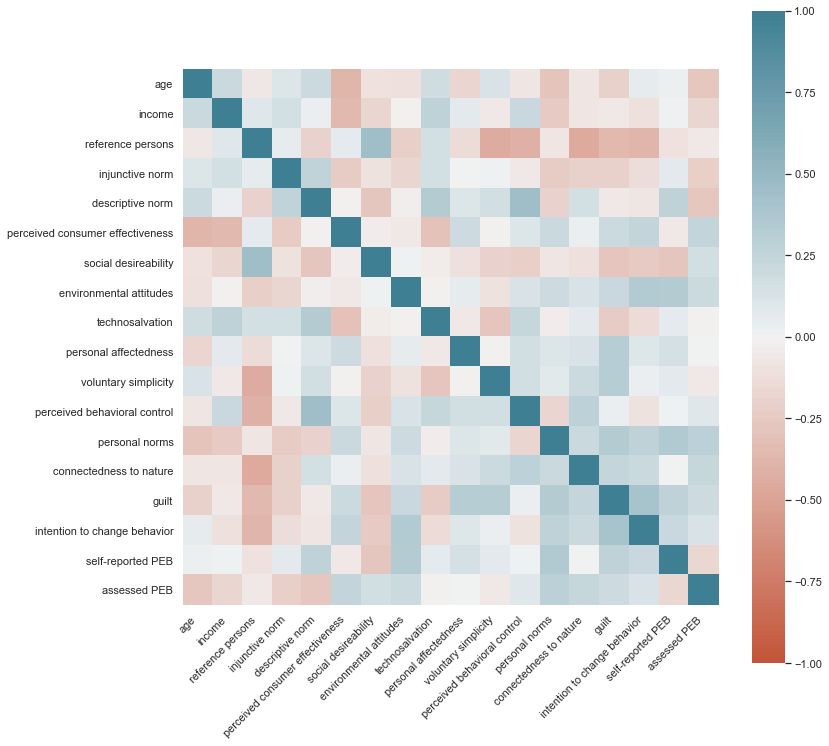

In [16]:
# calculate correlation coefficient
corr = df.corr(method='kendall')

# calculate column correlations and make a seaborn heatmap
sns.set(rc={'figure.figsize':(12,12)})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
heatmap = ax.get_figure()

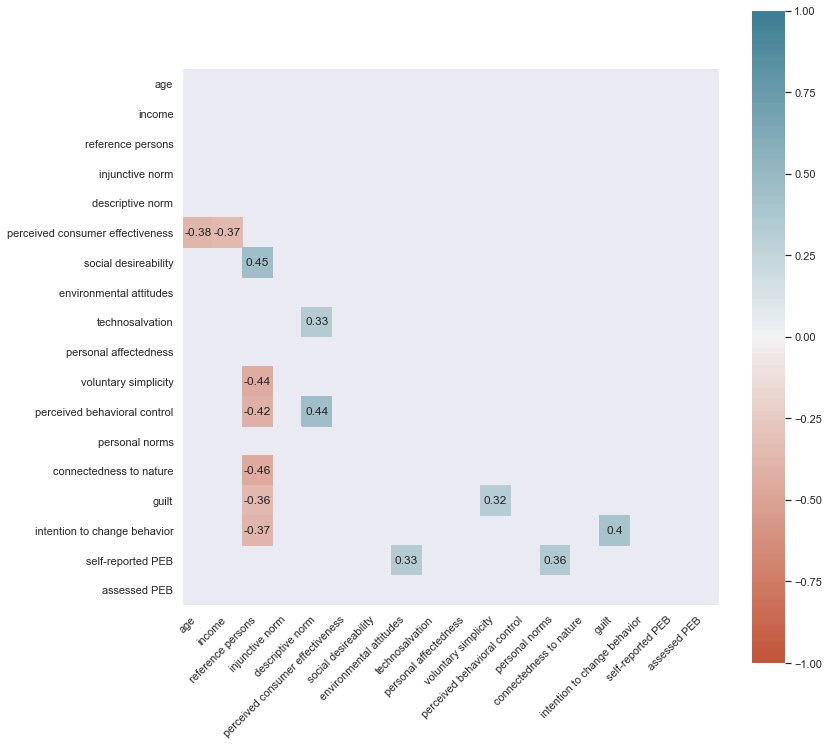

In [17]:
# calculate correlation coefficient and p-values
corr_p_values = df.corr(method = kendall_pval)
corr = df.corr(method='kendall')

# calculate column correlations and make a seaborn heatmap
sns.set(rc={'figure.figsize':(12,12)})

#set mask for only significant values (p < .05)
mask = np.invert(np.tril(corr_p_values<.05))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
heatmap = ax.get_figure()